In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_parquet('dfsemsn.parquet')

In [ ]:
df

,Flight,phaseOfFlight-1,bleedMonPress-1b,bleedMonPress-2b,bleedOutTemp-1b,bleedOutTemp-2b,time_since_maintenance,preFail
0,0.000363,0,0.383154,0.367788,0.868988,0.670756,0.000100,1
1,0.000363,1,0.403731,0.310494,0.873389,0.735685,0.000116,1
2,0.000363,2,0.422797,0.419065,0.880362,0.736624,0.000152,1
3,0.000727,0,0.416157,0.394223,0.869529,0.674298,0.000321,1
4,0.000727,1,0.297427,0.282097,0.876040,0.735018,0.000393,1
...,...,...,...,...,...,...,...,...
55476,0.126817,1,0.313240,0.308550,0.876110,0.732775,0.085706,0
55477,0.126817,2,0.388226,0.385254,0.884054,0.732802,0.085745,0
55478,0.127180,0,0.387693,0.375517,0.868205,0.692552,0.085855,0
55479,0.127180,1,0.399385,0.393030,0.875414,0.730016,0.085874,0


In [ ]:
df_x = df.drop('preFail', axis ='columns')

In [ ]:
df_y = df['preFail']

In [ ]:
X = df_x
Y = df_y
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.3,
                                                    random_state = 2)

In [ ]:
modelo = tree.DecisionTreeClassifier()
modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)

In [ ]:
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cm

array([[13083,   823],
       [  735,  2000]])

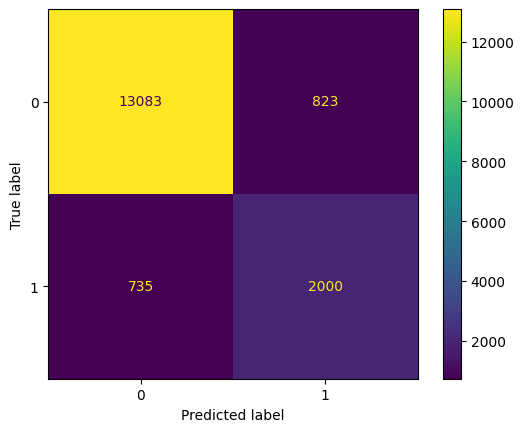

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [ ]:
print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9063758187608918


In [ ]:
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print('F1-Score: %f' % f1)

Precision:  0.7084661707403471
Recall:  0.7312614259597806
F1-Score: 0.719683


In [ ]:
scores = cross_val_score(modelo,X,Y,cv=5)

In [ ]:
scores

array([0.75139715, 0.68496485, 0.60759037, 0.6510412 , 0.64833679])